In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style="darkgrid")

In [271]:
df = pd.read_csv('wfp_food_prices_lka.csv', sep=',')

In [272]:
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.71,0.3339
2,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2722
3,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3409
4,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5137,2022-04-15,Western,Colombo,Colombo City,6.931944,79.847778,miscellaneous food,Sugar,KG,actual,Retail,LKR,233.77,1.1647
5138,2022-04-15,Western,Colombo,Colombo City,6.931944,79.847778,oil and fats,Oil (coconut),750 ML,actual,Retail,LKR,591.78,2.9484
5139,2022-04-15,Western,Colombo,Colombo City,6.931944,79.847778,pulses and nuts,"Cowpeas (whole, average)",KG,actual,Retail,LKR,671.92,3.3477
5140,2022-04-15,Western,Colombo,Colombo City,6.931944,79.847778,vegetables and fruits,Onions (imported),KG,actual,Retail,LKR,224.74,1.1197


Удалите 0 строку

In [273]:
df = df.drop(0)
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.71,0.3339
2,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2722
3,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3409
4,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2708
5,2004-03-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.92,0.3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5137,2022-04-15,Western,Colombo,Colombo City,6.931944,79.847778,miscellaneous food,Sugar,KG,actual,Retail,LKR,233.77,1.1647
5138,2022-04-15,Western,Colombo,Colombo City,6.931944,79.847778,oil and fats,Oil (coconut),750 ML,actual,Retail,LKR,591.78,2.9484
5139,2022-04-15,Western,Colombo,Colombo City,6.931944,79.847778,pulses and nuts,"Cowpeas (whole, average)",KG,actual,Retail,LKR,671.92,3.3477
5140,2022-04-15,Western,Colombo,Colombo City,6.931944,79.847778,vegetables and fruits,Onions (imported),KG,actual,Retail,LKR,224.74,1.1197


Посмотрите в какой валюте указана стоимость? Можно ли удалить столбец с другой валютой?

In [266]:
np.unique(df['currency'])

array(['LKR'], dtype=object)

В колонке `usdprice, price` записано целевое значение, которое мы хотим предсказывать. Необязательно предсказывать две цены. Давайте посмотрим на распределение таргетов в обучающей выборке. Для этого нарисуйте его гистограмму:

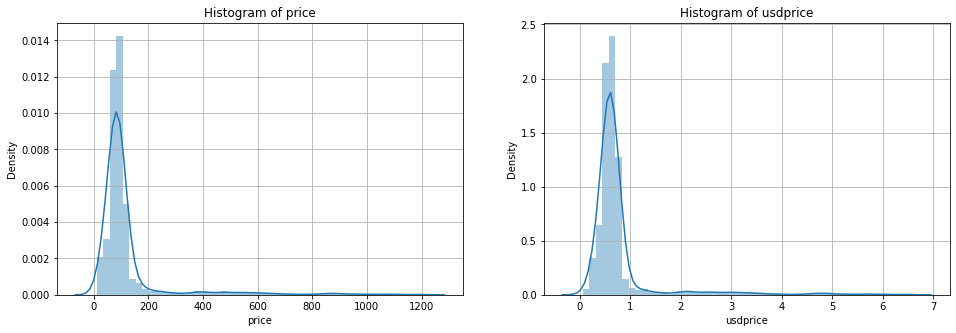

In [27]:
from matplotlib.pyplot import figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1 = sns.distplot(df['price'], ax=ax1)
ax1.set(
    title='Histogram of price', 
    ylabel='Density',
    xlabel='price'
)
ax1.grid(True)

ax1 = sns.distplot(df['usdprice'], ax=ax2)
ax1.set(
    title='Histogram of usdprice', 
    ylabel='Density',
    xlabel='usdprice'
)
ax1.grid(True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [274]:
df['usdprice'] = df['usdprice'].apply(lambda x: float(x))
df['price'] = df['price'].apply(lambda x: float(x))

In [54]:
from sklearn import metrics

temp = df.usdprice.mean()
print(temp)
print("MSE = %.10f" % metrics.mean_squared_error(
                               df.usdprice, 
                               temp * np.ones(df.shape[0])
))

0.7744113402061856
MSE = 0.5643528190


Для начала давайте посмотрим как менялись цены на разные категории. Постройте график зависимости цены от дня в году (например, можно воспользоваться sns.pointplot):

! Подумайте нужно ли строить график по признаку `category` или лучше по `commodity`

cereals and tubers
meat, fish and eggs
miscellaneous food
non-food
oil and fats
pulses and nuts
vegetables and fruits


/Users/mp/Documents/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


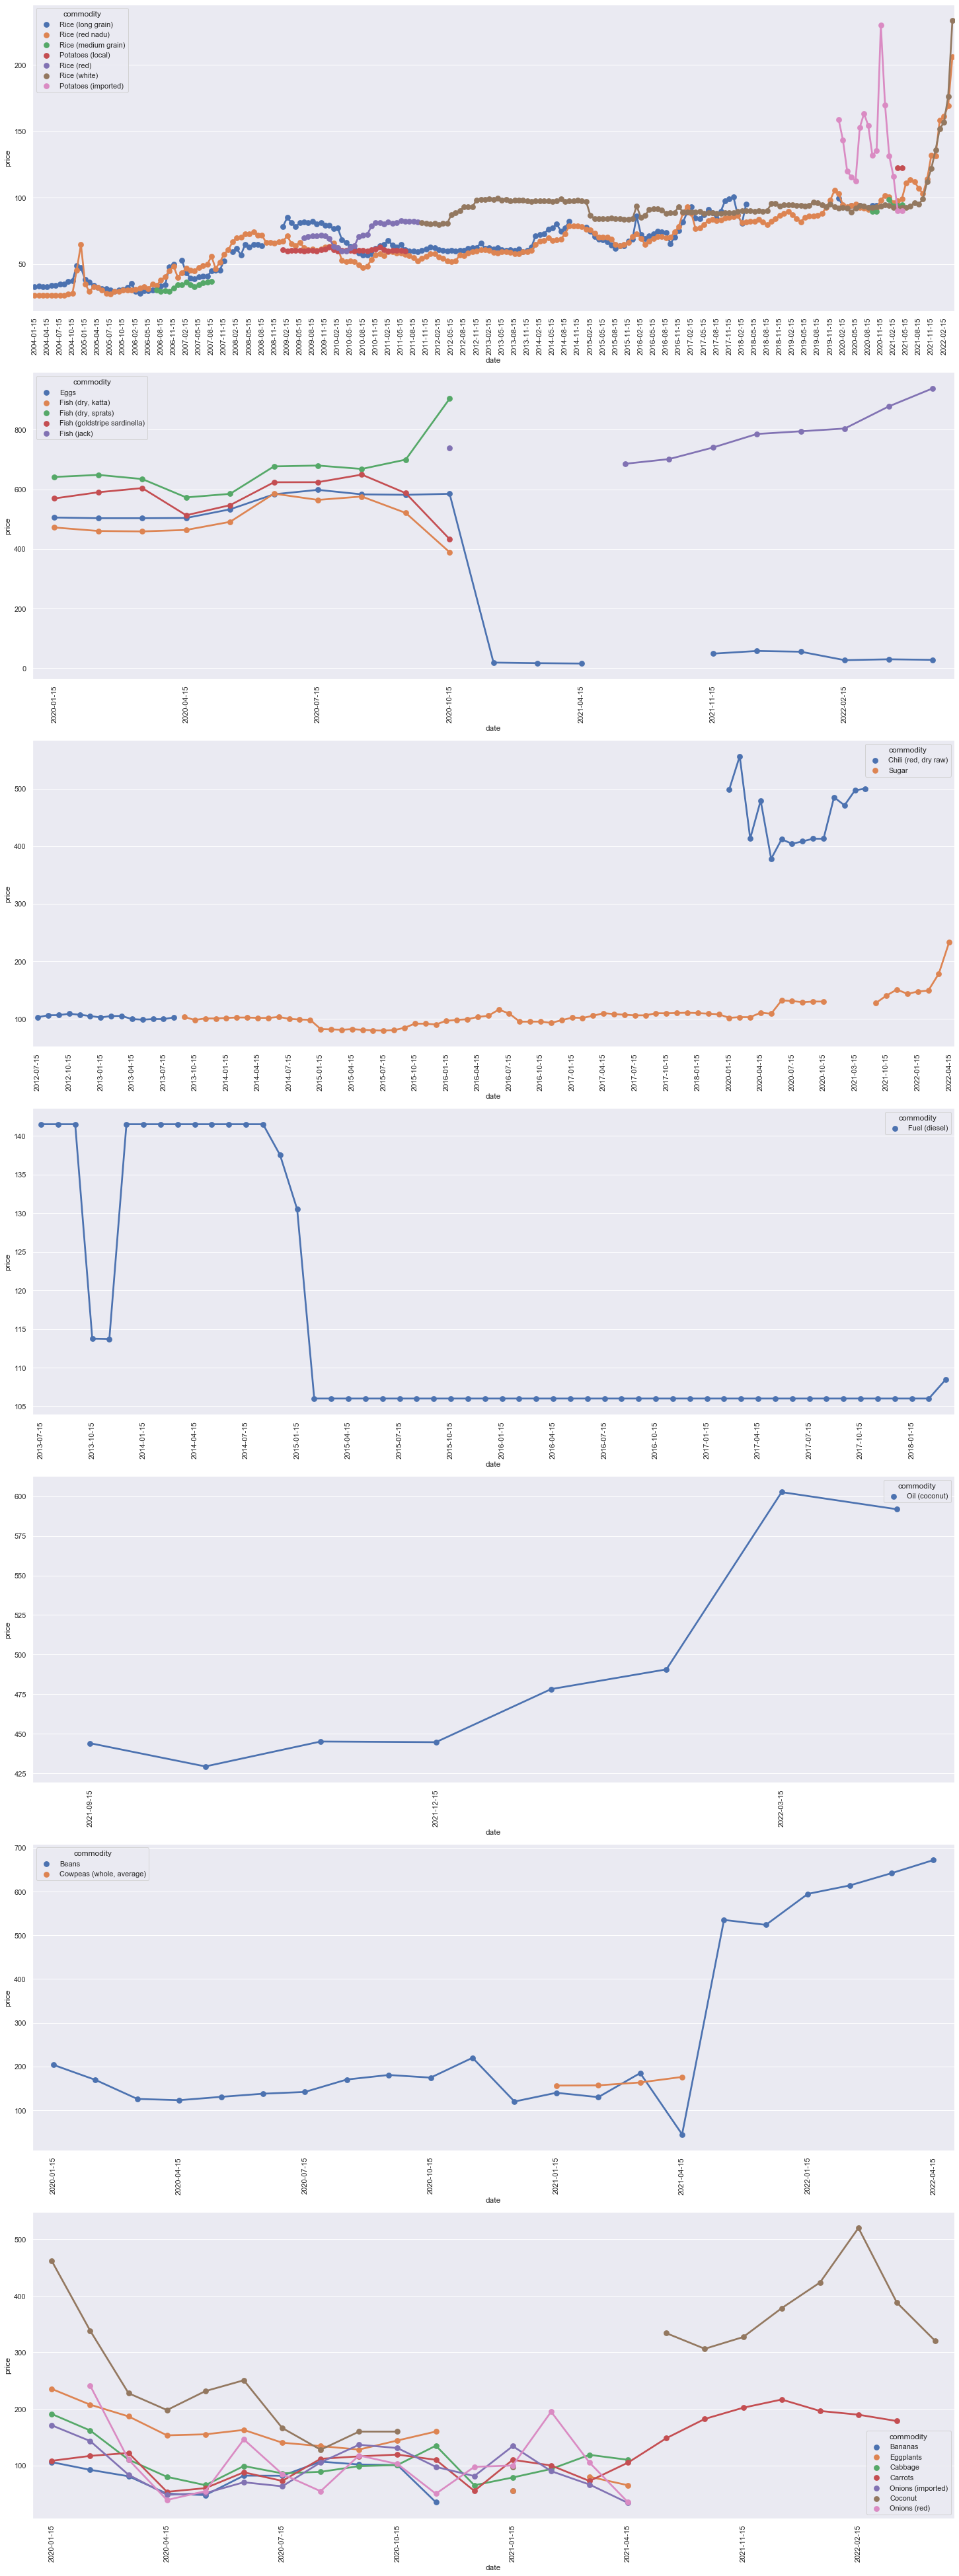

In [277]:
fig, axs = plt.subplots(7, 1, figsize=(25,70))
categories = np.unique(df['category'].tolist())
temp = df[df['category'] == "cereals and tubers"]
k = 0
for j in categories:
    print(j)
    temp = df[df['category'] == j]
    data = []
    commodity = []
    price = []
    for i in np.unique(temp.commodity):
        temp = df[(df['category'] == j) & (df['commodity'] == i)]
        ar = temp.groupby(df.date).mean()
        data += ar.index.tolist()
        price += ar['price'].tolist()
        commodity += [i for j in range(ar.size)]
    df3 = pd.DataFrame(list(zip(data, commodity, price)), columns=['date', 'commodity', 'price'])
    df3 = df3.sort_values(by="date")
    axs[k] = sns.pointplot(data=df3, x='date', y='price', ci=None, hue='commodity', ax=axs[k])
    x = [j if i % 3 == 0 else '' for i, j in enumerate(axs[k].get_xticklabels())]
    axs[k].set_xticklabels(x, rotation=90)
    k += 1
fig.show()

Сделайте вывод

Выделите из даты год, месяц, день

In [278]:
df['year'] = df['date'].apply(lambda x: int(x[:x.find('-')]))
df['month'] = df['date'].apply(lambda x: int(x[x.find('-') + 1:x.rfind('-')]))
df['day'] = df['date'].apply(lambda x: int(x[x.rfind('-') + 1: ]))

Проверьте признак новый признак `day`

In [279]:
np.unique(df.day.tolist())

array([15])

Признаки `day` и `priceflag` содержат по одному значению, удалим их

In [281]:
df=df.drop(['day', 'priceflag', 'currency'], axis=1)

KeyError: "['day' 'priceflag'] not found in axis"

In [286]:
df=df.drop(['currency', 'date'], axis=1)

Подумайте свзяаны ли призанки `market`, `latitude`, `longitude`, можно ли удалить какой-то из этих признаков? Объясните ответ.

In [246]:
temp = np.unique(df['market'].tolist())
for i in temp:
    arr = df[df['market'] == i]
    for j in temp:
        if i == j:
            continue
        arr1 = df[df['market'] == j]
        if (np.unique(arr.latitude.tolist()) == np.unique(arr1.latitude.tolist()) or np.unique(arr.longitude.tolist()) == np.unique(arr1.longitude.tolist())):            print(i, j)      
    
    if (len(np.unique(arr.latitude.tolist())) > 1 or len(np.unique(arr.longitude.tolist())) > 1):
        print(i)
        print(np.unique(arr.latitude.tolist()))
        print(np.unique(arr.longitude.tolist()))

/Users/mp/Documents/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [284]:
df=df.drop(['latitude', 'longitude'], axis=1)

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

categorical = ['admin1', 'admin2', 'market', 'category', 'commodity', 'unit', 'pricetype', 'year', 'month']
feuture =['admin1', 'admin2', 'market', 'category', 'commodity', 'unit', 'pricetype', 'year', 'month']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), [])
])


pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearRegression())
])

train, test = train_test_split(df, test_size=0.3, random_state=42)
x_train = train[feuture]
y_train = train[['usdprice']]
x_test = test[feuture]
y_test = test[['usdprice']]

a_x = pipeline.fit(x_train, y_train)
y_pred = a_x.predict(x_test)
y_pred_train = a_x.predict(x_train)
acc=mean_squared_error(y_pred,y_test)
print(acc)

0.035661012014764876
